📊 Model Evaluation Results:
MAE  : 6.54
RMSE : 8.05
R²   : 0.62


C:\Users\Ganika Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


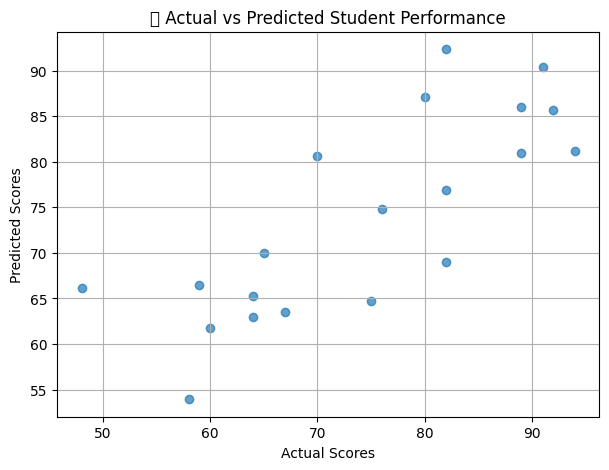

In [1]:
# ======================
# 1. Import Libraries
# ======================
import pandas as pd
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# ======================
# 2. Load Data and Model
# ======================
data = pd.read_csv("data/processed/student_scores_processed.csv")
xgb_reg = joblib.load("models/xgb_best_model.pkl")
label_encoders = joblib.load("models/label_encoders.pkl")

# ======================
# 3. Encode object columns (same as training)
# ======================
for col, le in label_encoders.items():
    data[col] = le.transform(data[col].astype(str))

# ======================
# 4. Split Data
# ======================
X = data.drop(columns=["final_score"])
y = data["final_score"]

# Use the same random state as before to match train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ======================
# 5. Make Predictions
# ======================
y_pred = xgb_reg.predict(X_test)

# ======================
# 6. Evaluate Model
# ======================
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation Results:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")

# ======================
# 7. Visualization
# ======================
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("🎯 Actual vs Predicted Student Performance")
plt.grid(True)
plt.show()
